***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.1. Jones notation](7_1_jones_notation.ipynb)
    * Next: [7.3. Direction-dependent and Independent effects](7_3_die_dde.ipynb)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 7.2. The Radio Interferometer Measurement Equation (RIME)<a id='instrum:sec:rime'></a>
The RIME naturally emerges as soon as we apply Jones calculus to an interferometric measurement. The purpose of an aperture synthesis interferometer is to measure *complex visibilities*, corresponding to the *coherency* between the E-fields at two different positions, $\langle e_1 e_2^* \rangle$. Let's take a look at how this can be measured.

### 7.2.1. A simplified model of a two-element interferometer and correlator

The technical details of interferometric measurements will be covered later on in this chapter (**CITE**); for now let us consider a simplified mathematical model. Consider for a two-element interferometer. Let us designate the two antennas by the indices $p$ and $q$. Let us designate the E-field vectors at the antenna's nominal positions as $\mathbf{e}_p$ and $\mathbf{e}_q$. 

Each antenna has a dual-receptor feed (because we want to capture full polarization information, that is, both the $e_x$ and $e_y$ components of the incipient EM field, we must use two receptors, such as e.g. two orthogonal dipoles); the incoming wavefront induces electrical currents in the receptors which our electronics then samples. For now, think of the measured quantities at each antenna as two sets of complex voltages $v_{p1},v_{p2}$ and $v_{q1},v_{q2}$, or two *voltage vectors*:

$$
\mathbf{v}_p = \left[ \begin{array}{c}v_{p1} \\ v_{p2} \end{array} \right],~~~
\mathbf{v}_q = \left[ \begin{array}{c}v_{q1} \\ v_{q2} \end{array} \right] 
$$

These voltages are then fed into a ***correlator***, which computes four complex cross-products called ***correlations***:

$$
V_{11}=\langle v_{p1}v_{q1}^*\rangle,~ V_{12}=\langle v_{p1}v_{q2}^*\rangle,~V_{21}=\langle v_{p2}v_{q1}^*\rangle,~V_{22}=\langle v_{p2}v_{q2}^*\rangle
$$

Note that at this point we're implicitly assuming that:

* the averaging operation $\langle\cdot\rangle$ is done over a time bin of finite (small) extent $\Delta t$

* the radiation is confined to a narrow frequency bin of $[\nu-\Delta\nu/2,\nu+\Delta\nu/2]$. (In actual fact a correlator will explicitly channelize the incoming signal into a set of narrow frequency channels, so the correlations above are computed per time bin, per frequency channel.)

#### 7.2.1.1. The correlation matrix
It will prove to be very convenient to treat the four correlations as a 2x2 matrix, because then we can represent it as the matrix product of $\mathbf{v}_p$ and $\mathbf{v}_q^H$, where $\cdot^H$ is the Hermitian (or conjugage) transpose operator:

$$
\mathbf{V}_{pq} = 
2 \left[ \begin{array}{cc}V_{11} & V_{12} \\ V_{21} & V_{22} \end{array} \right ] =
2\left\langle \left[ \begin{array}{c}v_{p1} \\ v_{p2} \end{array} \right] 
\left[ \begin{array}{cc}v_{q1}^* & v_{q2}^* \end{array} \right ] \right\rangle
= 2\langle \mathbf{v}_p \mathbf{v}_q^H \rangle 
$$

(NB: the factor of 2 is used as a matter of convention, see ***CITE RIME1*** for details). 

$\mathbf{V}$ is called the ***correlation matrix***, or often the ***visibility matrix***. The two terms are used somewhat interchangeably -- as we'll see below, the measured correlations are typically nothing more than the "true" underlying visibilities "corrupted" by the instrument response. 

#### 7.2.1.2. Enter Jones
Recall from the previous section that the voltage vectors at each antenna can be expressed as a product of the "source" EM field vector $\mathbf{e}$ by a 2x2 Jones matrix describing the entire signal propagation path from source to receiver. Since the signal comes to the two antennas via two different paths, each antenna will have its own Jones matrix:

$$
\mathbf{v}_p = \mathbf{J}_p \mathbf{e},~~~ 
\mathbf{v}_q = \mathbf{J}_q \mathbf{e} 
$$

Substituting this into the correlation matrix above, we have:

$$
\mathbf{V}_{pq} 
= 2\langle (\mathbf{J}_p \mathbf{e}) ( \mathbf{J}_p \mathbf{e})^H \rangle 
= 2\langle \mathbf{J}_p \mathbf{e}\mathbf{e}^H \mathbf{J}_q^H \rangle 
= \mathbf{J}_p \, 2\langle \mathbf{e}\mathbf{e}^H \rangle \, \mathbf{J}_q^H~~~~~~~~~(\mathrm{using} (\mathbf{AB})^H = \mathbf{B}^H\mathbf{A}^H)
$$

(Note that this implicitly assumes that ***Jones matrices are constant over the averging interval***.)

Let us now assume a single source of radiation in the sky. The quantity in the angle brackets, $2\langle \mathbf{e}\mathbf{e}^H\rangle$, is then called the **source brightness matrix**, designated $\mathbf{B}$.
Using the definition of the Stokes parameters in the [previous section](7_1_jones_notation.ipynb#instrum:sec:jones:stokes), we get a particularly pleasing way to express $\mathbf{B}$ in terms of $IQUV$:

$$
\mathbf{B} = 2\langle \mathbf{e}\mathbf{e}^H\rangle = 2 \left[ \begin{array}{cc}e_x e_x^* & e_x e_y^* \\ 
e_y e_x^* & e_y e_y^*  \end{array} \right ] =
\left[ \begin{array}{cc}I+Q & U+iV \\ 
U-iV & I-Q \end{array} \right ]
$$

### 7.2.2. The basic RIME of a point source<a id='instrum:sec:rime:point_source'></a>
This gives us the most basic form of the RIME:

$$
\mathbf{V}_{pq} = \mathbf{J}_{p} \mathbf{B} \mathbf{J}_{q}^H,
$$

that is, the measured correlation matrix is a product of three 2x2 matrices -- a Jones matrix representing the signal path to antenna $p$, a brightness matrix capturing the intrinsic properties (flux, polarization) of the source, and a Jones matrix representing the signal path to antenna $q$.

Recalling the concept of [7.1.5. Jones chains](7_1_jones_notation.ipynb#instrum:sec:jones:chains), we have:

$$
\mathbf{J}_p = \mathbf{J}_{p,n} \mathbf{J}_{p,n-1} \dots \mathbf{J}_{p,1}, 
$$

which gives us the "onion form" of the RIME:

$$
\mathbf{V}_{pq} = \mathbf{J}_{p,n}(\dots( \mathbf{J}_{p,1} \mathbf{B} \mathbf{J}_{q,1}^H)\dots)\mathbf{J}_{q,n}^H.
$$

The onion form makes it exp;licit how successive "layers" of propagation effects are applied to the signal as it makes its way from the source to the telescope.

#### 7.2.2.1. Specific RIMEs vs the general RIME

The general formalism above is commontly referred to as ***The*** Radio Interferometry Measurement Equation, or simply ***The*** Measurement Equation. When we want to describe a specific instrument and/or observation, we string together specific Jones terms, and thus derive ***a*** RIME or ***a*** measurement equation.For example, here's a RIME describing a very simple observation that takes into account only complex gains and geometric delay:

$$
\mathbf{V}_{pq} = \mathbf{G}_{p} K_p \mathbf{B} K_q^H \mathbf{G}_{q}^H.
$$

Let us now assume a perfect instrument (i.e. gains of unity) and concentrate on the geometric delay term. Our RIME then simplifies to

$$
\mathbf{V}_{pq} = K_p \mathbf{B} K_q^H.
$$

Recall the the K-Jones matrix is scalar, hence the use of roman rather than blodface font to designate it.

#### 7.2.2.2. Geometric delays
Consider now the geometry of our instrument. Let's pick a coordinate system $xyz$ with the $z$ axis pointing towards some reference direction on the celestial sphere $S_0$ (i.e. the direction we want to observe in). By convention, $x$ then is chosen to point East, and $y$ North on the sky. Note that this coordinate system is fixed to the sky, and the Earth rotates relative to it. The coordinate origin $O$ can be chosen arbitrarily. Let us designate the antenna positions in this coordinate system by $\mathbf{u}_p=(u_p,v_p,w_p)$ and $\mathbf{u}_q=(u_q,v_q,w_q)$. Let's assume a source of radiation at direction $S$; the unit length vector towards this direction is designated as $\mathbf{\sigma}$. 

<IMG src="figures/7_2_1_uvw.png">

The pathlength difference for a wavefront arriving from direction $\mathbf{\sigma}$ between the origin $O$ and antenna $p$ is the simply the scalar product $\mathbf{u}_p\cdot\mathbf{\sigma}.$ The K-Jones matrix corresponding to this pathlength difference is a scalar matrix given by

$$
K_p = \mathrm{e}^{-2\pi i (\mathbf{u}_p\cdot\mathbf{\sigma})/\lambda}
$$

Substituting this into the RIME above, and remembering that scalar matrices commute, we have

$$
\mathbf{V}_{pq} = K_p \mathbf{B} K_q^H = \mathbf{B} K_p K_q^H = 
\mathbf{B}\,\mathrm{e}^{-2\pi i ((\mathbf{u}_p - \mathbf{u_q})\cdot\mathbf{\sigma})/\lambda} =
\mathbf{B}\,\mathrm{e}^{-2\pi i (u_{pq}l+v_{pq}m+w_{pq}n)/\lambda},
$$

where $u_{pq},v_{pq},w_{pq}$ are the components of the ***baseline vector*** $\mathbf{u}_{pq}=\mathbf{u}_{p}-\mathbf{u}_{q}$, and $l,m,n$ are the components of the direction vector $\mathbf{\sigma}$ (also called the ***direction cosines***, since they are equal to the cosines of the angle formed by $\mathbf{\sigma}$ w.r.t. the coordinate axes). Note that $n=\sqrt{1-l^2-m^2}$, since $\mathbf{\sigma}$ is a unit length vector. 

#### 7.2.2.3. Effects of averaging & fringe stopping
Recall now that in deriving the RIME above, we made the assumption that Jones matrices are constant over the time (and frequency) averaging interval. In the case of K-Jones, it is easy to see that this is not necessarily so -- $uvw$ coordinates change over time due to the Earth's rotation, and the dependence on frequency is explicit in the $1/\lambda$ scaling of the exponent. This results in the phase term $K_{pq}=K_p K_q^H$ being a complex quantity with a rotating complex phase, and averaging a rotating complex phase (i.e. a vector average!) always reduces amplitude. In interferometry, this effect is known as time/frequency ***smearing***. In exteme cases, if the phase rotates through a cycle or more over the averaging interval, the vector average will be close to 0!

This is easy to illustrate with a simple plot:

Mean amplitude for 10 degree span: 0.999
Mean amplitude for 90 degree span: 0.900
Mean amplitude for 180 degree span: 0.637


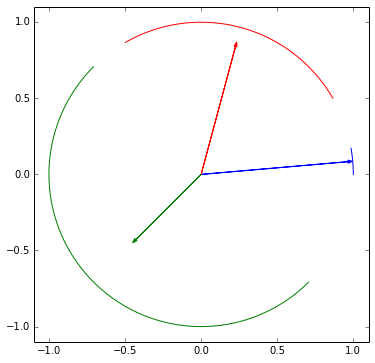

In [2]:
def plot_complex_sequence(start_phase, end_phase, color):
    # make sequence of phases from start to end
    ph = np.arange(start_phase,end_phase,.1)*np.pi/180
    # convert to complex quantity with unit amplitude and given phase, take the mean
    x = np.exp(1j*ph)
    xm = x.mean()
    # plot sequence
    plt.plot(x.real,x.imag,color)
    # plot arrow indicating mean value
    plt.arrow(0,0,xm.real,xm.imag,length_includes_head=True,color=color)
    print 'Mean amplitude for %d degree span: %.3f'%(end_phase-start_phase, abs(xm))
plt.figure(figsize=(6,6))
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plot_complex_sequence(0,10,'b')
plot_complex_sequence(30,120,'r')
plot_complex_sequence(135,315,'g')

Fortunately, we can mimimize the effect of smearing in a particular direction of interest. Consider the figure above -- for a wavefront arriving from direction $S_0$, the direction vector is $\mathbf{\sigma}_0 = (0,0,1)$, and the corresponding phase term is

$$
\mathrm{e}^{-2\pi i (\mathbf{u}_{pq}\cdot\mathbf{\sigma_0})/\lambda} = \mathrm{e}^{-2\pi i w_{pq}n/\lambda}
$$

This corresponds to the excess pathlength $\tau_0$ in the figure above, associated with baseline $pq$ and direction $S_0$. It is common practice for the correlator to insert an artificial delay of $-\tau_0$ into its signal chain. This results in the effective K-Jones (for direction $\sigma$) becoming

$$
K_{pq} = \mathrm{e}^{-2\pi i (u_{pq}l+v_{pq}m+w_{pq}n)/\lambda} \mathrm{e}^{-2\pi i w_{pq}n/\lambda} = 
\mathrm{e}^{-2\pi i (u_{pq}l+v_{pq}m+w_{pq}(n-1))/\lambda} 
$$

The effect of fringe stopping is to minimize both the phase and the variation of phase of $K_{pq}$ in the vicinity of the reference direction $S_0$. It is easy to see that this is the case, since $l,m,n-1$ are all small numbers for $S$ close to $S_0$.

This artifical delay is called ***fringe stopping***. In a fringe stopping correlator, the K-Jones term becomes

$$
K_p = \mathrm{e}^{-2\pi i (u_{p}l+v_{p}m+w_{p}(n-1))/\lambda} 
$$


### 7.2.3. The all-sky RIME

Consider again the [basic RIME of a point source](#instrum:sec:rime:point_source). The real sky is not a single-point source, but rather a brightness distribution. We can express this by making $\mathbf{B}$ a function of direction: $\mathbf{B}(\mathbf{\sigma})$. The signal path from each direction is also in principle different, hence the Jones matrix should also be a function of direction, $\mathbf{J}_p(\mathbf{\sigma})$. Assuming a linear system again, the aggregate correlation $\mathbf{V}_{pq}$ recorded by our interferometer can be obtained by integrating the RIME over the entire celestial spehere:

$$
\mathbf{V}_{pq} = 
\iint\limits_{4\pi} \mathbf{J}_p(\mathbf{\sigma}) \mathbf{B}(\mathbf{\sigma}) \mathbf{J}_q(\mathbf{\sigma})^H d\mathbf{\sigma}
$$

To make this integral a little more tractable, let us change variables to $l,m$, which is equivalent to projecting [half of] the celestial spehere onto a plane tangential at $S_0$. (We can safely assume that the other half of the sphere is not visible to our instrument. With a few excotic exceptions such as space interferometry, this is generally the case). We have:

$$
\mathbf{V}_{pq} = 
\iint\limits_{lm} \mathbf{J}_p(l,m) \mathbf{B}(l,m) \mathbf{J}_q(l,m)^H \frac{d\mathbf{\sigma}}{dldm} dl dm = 
\iint\limits_{lm} \mathbf{J}_p(l,m) \mathbf{B}(l,m) \mathbf{J}_q(l,m)^H \frac{1}{n} dl dm = 
$$

Let us now split $\mathbf{J}_p$ into a direction-dependent and direction-independent part. Recall that $\mathbf{J}_p$ is a product of a [Jones chain](7_1_jones_notation.ipynb#instrum:sec:jones:chains) of Jones matrices representing successive propagation effects:

$$
\mathbf{J}_p = \mathbf{J}_{p,n} \mathbf{J}_{p,n-1} ... \mathbf{J}_{p,1},
$$

Some of the terms in the chain are functions of $l,m$ and are thus called ***direction-dependent effects*** (DDEs), while others do not depend on $l,m$, and are therefore ***direction-independent effects*** (DIEs). As a general trend (but by no means a rule), effects on the left side of the chain ("in the instrument"), such us electronic gain, will be DI, while effects on the right of the chain ("in the sky") will be DD. Note that there's always at least one DDE present, and that is the geometric delay term $K_p$. Being scalar, we can commute it to any position in the chain, in particular the rightmost one. Now, let's designate the **leftmost** remaining DDE in the chain by $k$ (it is possible that $k=n$, i.e. there are no DIEs).  We have: 

$$
\mathbf{J}_p(l,m) = (\mathbf{J}_{p,n} ... \mathbf{J}_{p,k+1})
(\mathbf{J}_{p,k} ... \mathbf{J}_{p,2}) K_p = \mathbf{G}_p \mathbf{E}_p(l,m) K_p(l,m)
$$

Here, the DI part is designated by $\mathbf{G}$ and the DD part by $\mathbf{E}$.
Substituting this into the integral, and expanding $K$, we have:

$$
\mathbf{V}_{pq} = \mathbf{G}_p \left( \iint\limits_{lm} \frac{1}{n} \mathbf{E}_p(l,m) \mathbf{B}(l,m) \mathbf{E}_q^H(l,m) \mathrm{e}^{-2\pi i(u_{pq}l+v_{pq}m+w_{pq}(n-1))/\lambda} dl dm \right )  \mathbf{G}_q^H,
$$

which is beginning to resemble a 2D Fourier transform. One final wrinkle remains. The $w_{pq}(n-1)$ term in the exponent can be split into two per-antenna parts, since $w_{pq}=w_p-w_q$. We can define a notional W-Jones as:

$$
W_p = \frac{1}{\sqrt{n}} \mathrm{e}^{w_p(n-1)},
$$

and treat it as a DDE that can be absorbed in the $\mathbf{E}_p$ part of the Jones chain. Without loss of generality, we can then write:

$$
\mathbf{V}_{pq} = \mathbf{G}_p \left( \iint\limits_{lm} \mathbf{B}_{pq}(l,m) \mathrm{e}^{-2\pi i(u_{pq}l+v_{pq}m)/\lambda} dl dm \right )  \mathbf{G}_q^H,~~~\mathbf{B}_{pq} = \mathbf{E}_p \mathbf{B} \mathbf{E}_q^H
$$

This excplicitly shows that the measured correlations are related to a 2D Fourier transform of the sky.

#### 7.2.3.1. When is it a Fourier transform?
In previous chapters (**CITE**) we implicitly assumed that an interferometer directly measures visibilities that correspond to a 2D Fourier transform (FT) of the sky. This is the underlying assumption of classical interferometry. In the literature you will often see mention of DDEs and "wide field" and the "$w$-term" in the context of breaking this assumption, and thus introducing distortions. The RIME formulation above makes it easy to understand the FT assumption and what happens when it's broken.

The matrix $\mathbf{B}_{pq}$ in the equation above is known as the ***apparent sky*** *seen by baseline $pq$*. If we assume for a minute that every baseline sees the same apparent sky $\mathbf{B}_\mathrm{app}$ throughout the duration of the measurement (and remember that it may take several hours to fill the $uv$-plane), then the RIME becomes a true Fourier transform:

$$
\mathbf{V}_{pq} = \mathbf{G}_p \left( \iint\limits_{lm} \mathbf{B}_\mathrm{app}(l,m) \mathrm{e}^{-2\pi i(u_{pq}l+v_{pq}m)/\lambda} dl dm \right )  \mathbf{G}_q^H
$$

this is often written in shorthand as

$$
\mathbf{V}_{pq} = \mathbf{G}_p \mathbf{X}_{pq}  \mathbf{G}_q^H
$$

and interpreted as follows: each baseline, at each point in time, observes a *coherency* that corresponds to a 2D Fourier transform of the sky brightness distribution, multiplied by per-antenna G-Jones matrices corresponding to direction-independent instrumental effects. Basic direction-independent calibration (***CITE CHAPTER 8***, also known as second-generation calibration, or 2GC) consists of fitting the $\mathbf{G}$ terms in some sort of least-squares way, and the inverse of the solutions $\mathbf{\tilde G}$ to the observed data, to obtain ***corrected data***

$$
\mathbf{V}_{pq}^\mathrm{(corr)} = \mathbf{\tilde G}_p^{-1} \mathbf{V}_{pq} \mathbf{\tilde G}_q^{-H} \approx \mathbf{X}_{pq}
$$

which is then imaged to obtain an image of the sky.




#### 7.2.3.2. Apparent skies and classical interferometry
The question is, when *can* we assume that every baseline sees the same apparent sky? Since $\mathbf{B}_{pq} = \mathbf{E}_p \mathbf{B} \mathbf{E}_q^H$, the abstract answer is simple: when the DDE term $\mathbf{E}_p$ is the same across all antennas, and constant in time. We call such DDEs ***trivial DDEs***:

$$
\mathrm{if}~~\mathbf{E}_p(t) \equiv \mathbf{E}~~\mathrm{for~all}~~t,p,~~\mathrm{then}~~\mathbf{B}_\mathrm{app}=\mathbf{EBE}^H
$$

To understand whether a DDE is trivial or not, we need to consider what effects go into $\mathbf{E}_p$ more closely. For starters, we introduced a W-Jones above and absorbed it into $\mathbf{E}_p$:

$$
W_p = \frac{1}{\sqrt{n}} \mathrm{e}^{w_p(n-1)},
$$

This is generally not a trivial DDE: the $w_p$ coordinate can be different for all antennas, and varies as a function of time (since the Earth rotates). However, if one of two conditions is met:

* the field-of-view is small, therefore $n=\sqrt{1-l^2-m^2}\approx1$

* the array is co-planar and remains so for the duration of the observation (i.e. all antennas lie in a plane), in which case we can choose a coordinate system where all $w_bp=0$

...then the W-Jones term becomes unity and can be neglected. This is called the ***narrow-field assumption*** and the ***coplanarity assumption***. Narrow fields-of-view are the usual case with larger dishes, and/or at higher frequencies. Coplanarity is only possible if:

* we do a short ("snapshot") observation with a small array -- 

* our antennas are laid out along an East-West line 

New instruments (LOFAR, MeerKAT, SKA1) tend to be wide-field and thus need to deal with $W$.



##### Narrow field vs. wide-field
The field of view of an interferometer is restricted by the primary beam (***CITE***), which is roughly determined by $\lambda/D$, where $D$ is the dish size. This means that the narrow-field regime corresponds to large dishes and/or shorter wavelengths. As a rough reference:

* The JVLA (25m dish) at X-band ($\lamba~$3cm) 

* The JVLA (25m dish) at L-band ($\lamba=$21cm) 


### Mueller notation